In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

seed=99
random.seed(seed)
np.random.seed(seed)

In [2]:
usa = pd.read_csv("../data/usa.csv")

In [15]:
usa.head() # year, month, day

,DateTime,Consumption,Temperature
0,2004-01-01 00:00:00,1397668.0,5.757576
1,2004-01-01 01:00:00,1351507.0,5.151515
2,2004-01-01 02:00:00,1315742.0,4.242424
3,2004-01-01 03:00:00,1308023.0,2.373737
4,2004-01-01 04:00:00,1344117.0,1.464646


In [16]:
usa.tail()

,DateTime,Consumption,Temperature
39427,2008-06-30 19:00:00,0.0,NaN
39428,2008-06-30 20:00:00,0.0,NaN
39429,2008-06-30 21:00:00,0.0,NaN
39430,2008-06-30 22:00:00,0.0,NaN
39431,2008-06-30 23:00:00,0.0,NaN


In [4]:
usa.shape

(39432, 3)

In [5]:
usa.describe()

,Consumption,Temperature
count,3.943200e+04,39414.000000
mean,1.590239e+06,14.129105
std,4.753389e+05,9.605224
min,0.000000e+00,-13.585859
25%,1.359224e+06,6.565657
50%,1.569116e+06,14.696970
75%,1.873294e+06,21.868687
max,3.280423e+06,37.878788


In [6]:
usa.isnull().sum()

DateTime        0
Consumption     0
Temperature    18
dtype: int64

In [10]:
missing_temp_indices = usa[usa['Temperature'].isna()].index
print(missing_temp_indices)
print('length =', usa.shape[0])

Index([39414, 39415, 39416, 39417, 39418, 39419, 39420, 39421, 39422, 39423,
       39424, 39425, 39426, 39427, 39428, 39429, 39430, 39431],
      dtype='int64')
length = 39432


Impute missing values:  
We can see that we are missing some values in the `Temperature` feature. In order to fill in these values we can impute them by the average of the values before and after to simulate a natural change in temperature. We can implement a custom function that finds the missing values, identifies the nearest non-missing values, calculates their average and fill in the missing value with the result, but there already exists some functionality to do almost the same. 

After further analysis we can see that the 18 missing values are the last 18 observations in the time series.

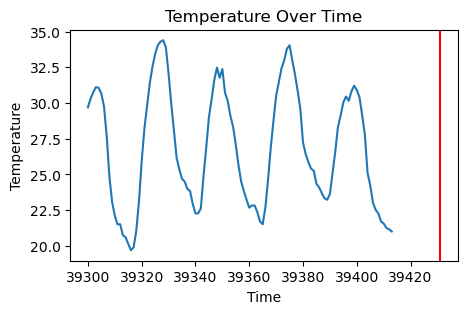

In [12]:
usa['Temperature'][39300:].plot(kind='line', figsize=(5, 3), title='Temperature Over Time')
plt.xlabel('Time')  # Assuming the index represents time
plt.ylabel('Temperature')
plt.axvline(x=39431, color='red')
plt.show()

In [ ]:
# Impute missing values by first doing a forward fill, then a backward fill.
#usa['Temperature'] = usa['Temperature'].fillna(method='ffill').fillna(method='bfill')

# Impute missing values with SimpleImputer
#from sklearn.impute import SimpleImputer

#imputer = SimpleImputer(strategy='mean')
#usa[['Temperature']] = imputer.fit_transform(usa[['Temperature']])

## Conclusion
The data contains missing values in the `Temperature` feature. These values are the last 18 observations of the time series and we can therefore just remove the last 18 steps from the dataframe before further analysis.